In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format


In [26]:
advertise = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(advertise.head())

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [13]:
advertise.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [27]:
advertise.drop('Unnamed: 0', axis= 1, inplace=True)

In [15]:
advertise.describe()

,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000
mean,147.042,23.264,30.554,14.023
std,85.854,14.847,21.779,5.217
min,0.700,0.000,0.300,1.600
25%,74.375,9.975,12.750,10.375
50%,149.750,22.900,25.750,12.900
75%,218.825,36.525,45.100,17.400
max,296.400,49.600,114.000,27.000


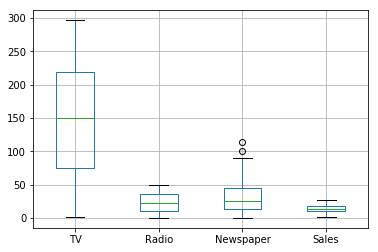

In [16]:
advertise.boxplot()
plt.show()

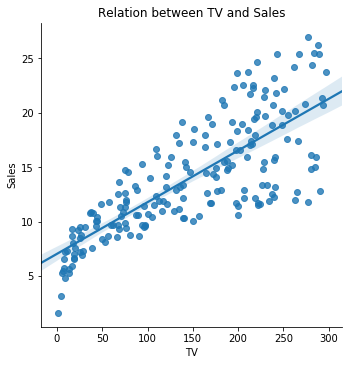

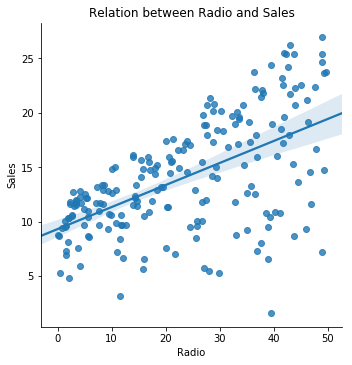

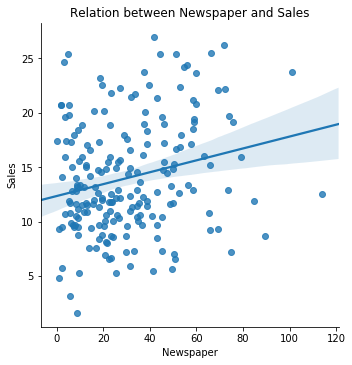

In [26]:
sns.lmplot(data = advertise, x= 'TV', y = 'Sales')
plt.title('Relation between TV and Sales')

sns.lmplot(data = advertise, x= 'Radio', y = 'Sales')
plt.title('Relation between Radio and Sales')

sns.lmplot(data = advertise, x= 'Newspaper', y = 'Sales')
plt.title('Relation between Newspaper and Sales')

plt.show()

In [28]:
regr = linear_model.LinearRegression()
Y = advertise['Sales'].values.reshape(-1, 1)
X = advertise[['TV','Radio','Newspaper']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


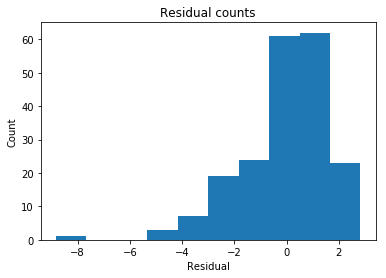

In [5]:
predicted = regr.predict(X).ravel()
actual = advertise['Sales']
# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

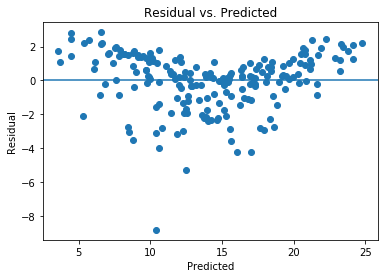

In [6]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

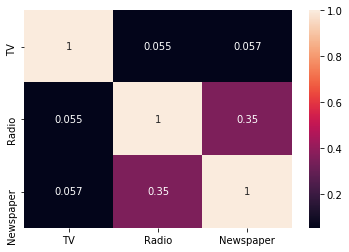

In [30]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True)

In [6]:
print('Data falling below 1 percentile : ')
print(advertise[advertise.Newspaper < np.percentile(advertise.Newspaper,1)]['Newspaper'])
print()
print('Data falling above 99th percentile : ')
print(advertise[advertise.Newspaper > np.percentile(advertise.Newspaper,99)]['Newspaper'])

Data falling below 1 percentile : 
33   0.300
65   0.900
Name: Newspaper, dtype: float64

Data falling above 99th percentile : 
16    114.000
101   100.900
Name: Newspaper, dtype: float64


In [7]:
stats.mstats.winsorize(advertise.Newspaper, limits=0.01, inplace= True)

masked_array(data = [ 69.2  45.1  69.3  58.5  58.4  75.   23.5  11.6   1.   21.2  24.2   4.
  65.9   7.2  46.   52.9  89.4  55.8  18.3  19.1  53.4  23.5  49.6  26.2
  18.3  19.5  12.6  22.9  22.9  40.8  43.2  38.6  30.    1.    7.4   8.5
   5.   45.7  35.1  32.   31.6  38.7   1.8  26.4  43.3  31.5  35.7  18.5
  49.9  36.8  34.6   3.6  39.6  58.7  15.9  60.   41.4  16.6  37.7   9.3
  21.4  54.7  27.3   8.4  28.9   1.    2.2  10.2  11.   27.2  38.7  31.7
  19.3  31.3  13.1  89.4  20.7  14.2   9.4  23.1  22.3  36.9  32.5  35.6
  33.8  65.7  16.   63.2  73.4  51.4   9.3  33.   59.   72.3  10.9  52.9
   5.9  22.   51.2  45.9  49.8  89.4  21.4  17.9   5.3  59.   29.7  23.2
  25.6   5.5  56.5  23.2   2.4  10.7  34.5  52.7  25.6  14.8  79.2  22.3
  46.2  50.4  15.6  12.4  74.2  25.9  50.6   9.2   3.2  43.1   8.7  43.
   2.1  45.1  65.6   8.5   9.3  59.7  20.5   1.7  12.9  75.6  37.9  34.4
  38.9   9.    8.7  44.3  11.9  20.6  37.   48.7  14.2  37.7   9.5   5.7
  50.5  24.3  45.2  34.6  30.7  4

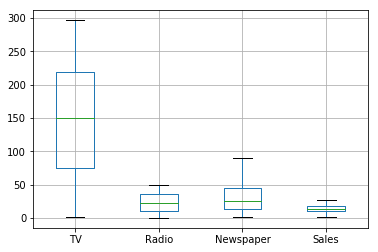

In [37]:
advertise.boxplot()
plt.show()


Coefficients: 
 [[ 0.04576514  0.18852705 -0.00105438]]

Intercept: 
 [ 2.93921588]

R-squared:
0.897210241081


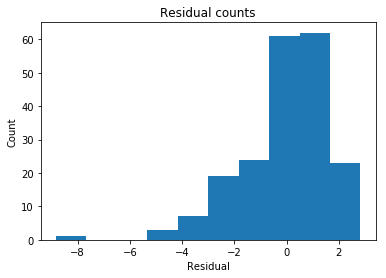

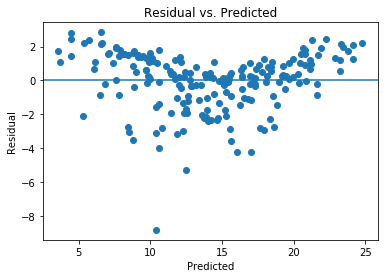

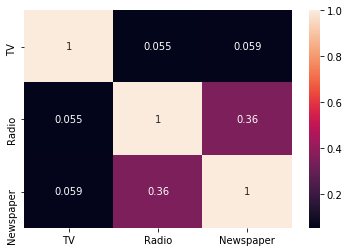

In [8]:
regr = linear_model.LinearRegression()
Y = advertise['Sales'].values.reshape(-1, 1)
X = advertise[['TV','Radio','Newspaper']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = advertise['Sales']
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True)


Coefficients: 
 [[ 0.04575482  0.18799423]]

Intercept: 
 [ 2.92109991]

R-squared:
0.897194261083


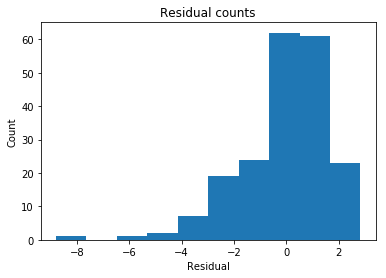

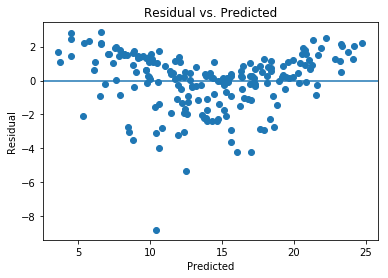

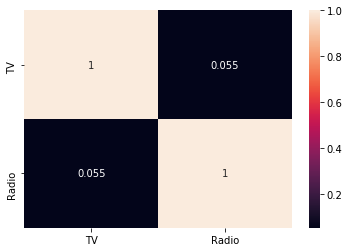

In [9]:
regr = linear_model.LinearRegression()
Y = advertise['Sales'].values.reshape(-1, 1)
X = advertise[['TV','Radio']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = advertise['Sales']
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True)

In [44]:
advertise.Sales.describe()

count   200.000
mean     14.023
std       5.217
min       1.600
25%      10.375
50%      12.900
75%      17.400
max      27.000
Name: Sales, dtype: float64

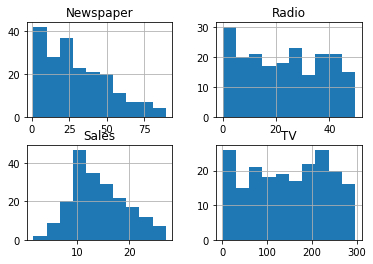

In [9]:
advertise.hist()
plt.show()

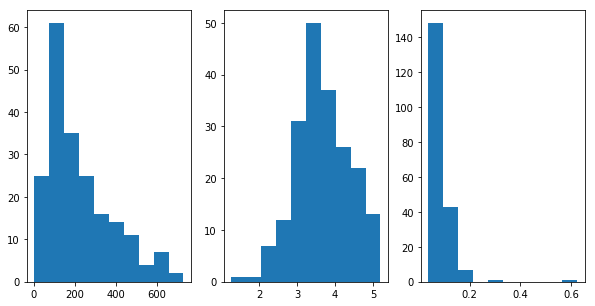

In [49]:
# log, sqrt, inverse
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.hist(np.square(advertise.Sales))
plt.subplot(1,3,2)
plt.hist(np.sqrt(advertise.Sales))
plt.subplot(1,3,3)
plt.hist(1/advertise.Sales)
plt.show()

In [19]:
advertise.Sales.describe()

count   200.000
mean     14.023
std       5.217
min       1.600
25%      10.375
50%      12.900
75%      17.400
max      27.000
Name: Sales, dtype: float64

In [29]:
advertise['log_TV'] = np.log(advertise.TV)


Coefficients: 
 [[ 3.93375716  0.20538391]]

Intercept: 
 [-9.13426752]

R-squared:
0.906574834534


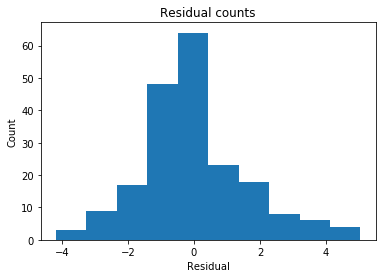

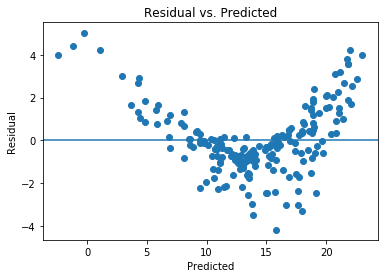

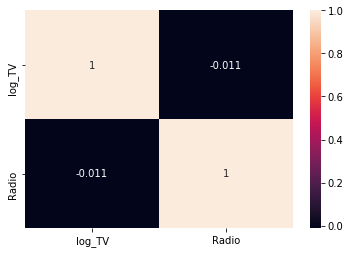

In [30]:
regr = linear_model.LinearRegression()
Y = advertise['Sales'].values.reshape(-1, 1)
X = advertise[['log_TV','Radio']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = advertise['Sales']
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True)

In [31]:
advertise = advertise.loc[advertise['Radio'] != 0]

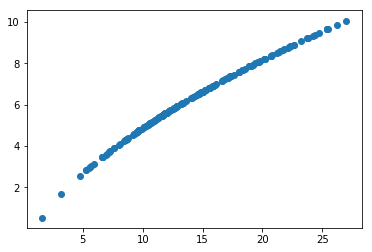

In [32]:
from scipy.stats import boxcox
bc = boxcox(advertise['Sales'])
plt.scatter(advertise['Sales'], bc[0])
plt.show()

advertise['Sales_BC'] = bc[0]

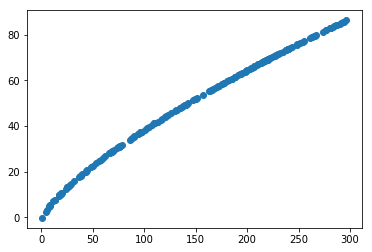

In [33]:
from scipy.stats import boxcox
bc = boxcox(advertise['TV'])
plt.scatter(advertise['TV'], bc[0])
plt.show()

advertise['TV_BC'] = bc[0]

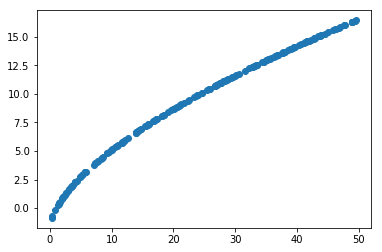

In [34]:
from scipy.stats import boxcox
bc = boxcox(advertise[advertise['Radio'] != 0]['Radio'])
plt.scatter(advertise[advertise['Radio'] != 0]['Radio'], bc[0])
plt.show()

advertise['Radio_BC'] = bc[0]


Coefficients: 
 [[ 0.01583539  0.06027747]]

Intercept: 
 [ 2.44151717]

R-squared:
0.883511760939


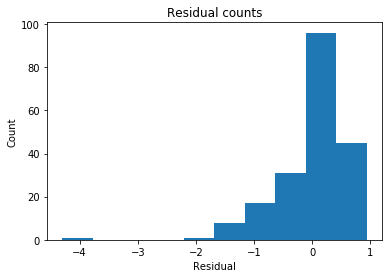

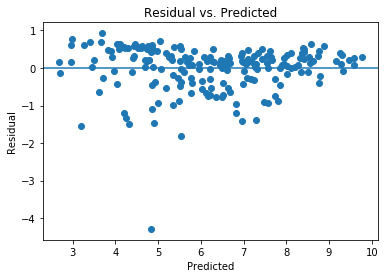

In [35]:
regr = linear_model.LinearRegression()
Y = advertise['Sales_BC'].values.reshape(-1, 1)
X = advertise[['TV','Radio']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = advertise['Sales_BC']
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()




Coefficients: 
 [[ 0.05831894  0.061251  ]]

Intercept: 
 [ 1.89542907]

R-squared:
0.914245171026


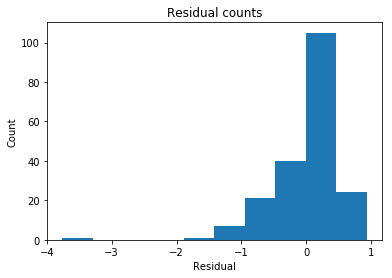

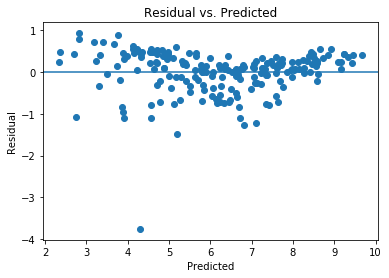

In [36]:
regr = linear_model.LinearRegression()
Y = advertise['Sales_BC'].values.reshape(-1, 1)
X = advertise[['TV_BC','Radio']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = advertise['Sales_BC']
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()




Coefficients: 
 [[ 0.16701454  0.57647476]]

Intercept: 
 [ 0.65467797]

R-squared:
0.907326934423


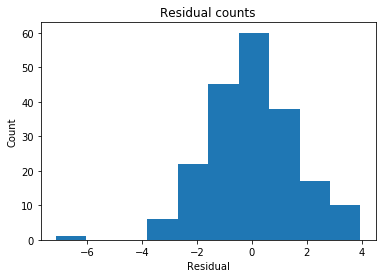

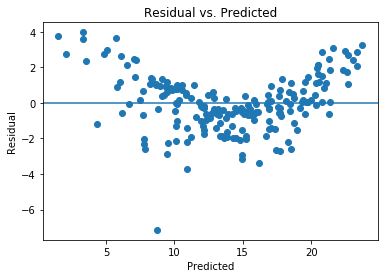

In [37]:
regr = linear_model.LinearRegression()
Y = advertise['Sales'].values.reshape(-1, 1)
X = advertise[['TV_BC','Radio_BC']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = advertise['Sales']
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()




Coefficients: 
 [[ 0.04574743  0.56821753]]

Intercept: 
 [ 2.16940657]

R-squared:
0.88813506392


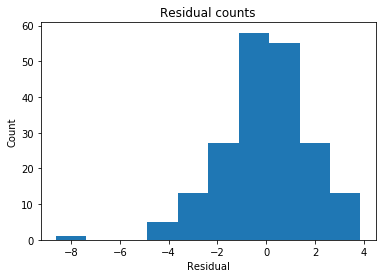

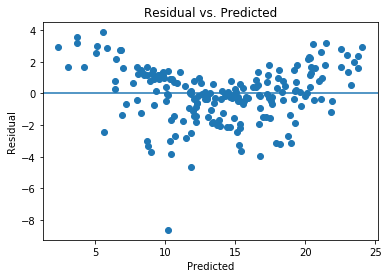

In [38]:
regr = linear_model.LinearRegression()
Y = advertise['Sales'].values.reshape(-1, 1)
X = advertise[['TV','Radio_BC']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = advertise['Sales']
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()




Coefficients: 
 [[ 1.4204009   0.06606445]]

Intercept: 
 [-1.99823199]

R-squared:
0.947698059365


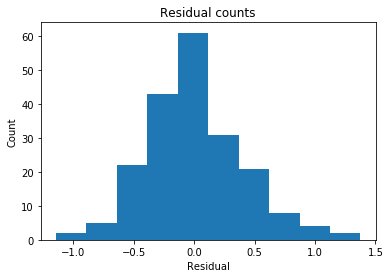

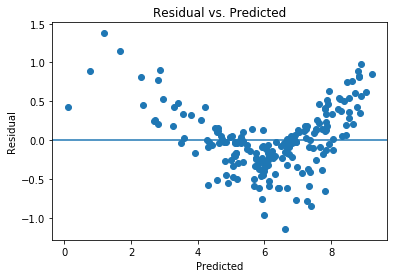

In [39]:
regr = linear_model.LinearRegression()
Y = advertise['Sales_BC'].values.reshape(-1, 1)
X = advertise[['log_TV','Radio']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = advertise['Sales_BC']
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()



In [40]:
advertise['Sales_sqrt'] = advertise['Sales']**0.5
advertise['TV_sqrt'] = advertise['TV']**0.5
advertise['Radio_sqrt'] = advertise['Radio']**0.5


Coefficients: 
 [[ 0.97106172  1.60265919]]

Intercept: 
 [-4.26261231]

R-squared:
0.911037018009


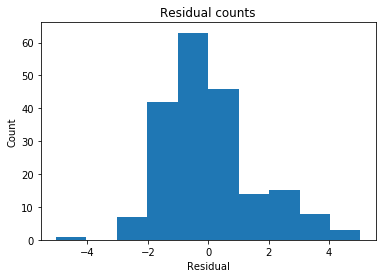

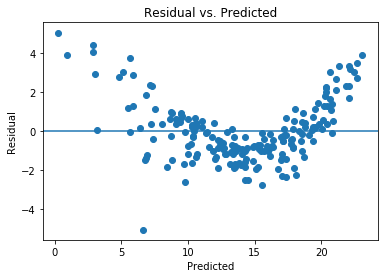

In [41]:
regr = linear_model.LinearRegression()
Y = advertise['Sales'].values.reshape(-1, 1)
X = advertise[['TV_sqrt','Radio_sqrt']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = advertise['Sales']
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()



In [42]:
advertise['Sales_log'] = np.log(advertise['Sales'])

advertise['TV_log'] = np.log(advertise['TV'])

advertise['Radio_v2'] = advertise['Radio'].apply(lambda x: x+1 if x == 0 else x)
advertise['Radio_log'] = np.log(advertise['Radio_v2'])



Coefficients: 
 [[ 3.83516696  2.55992679]]

Intercept: 
 [-11.0416801]

R-squared:
0.820643262258


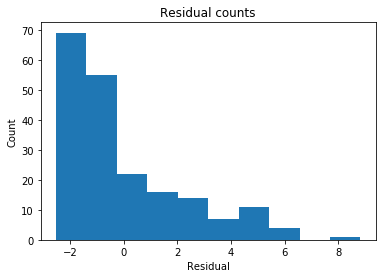

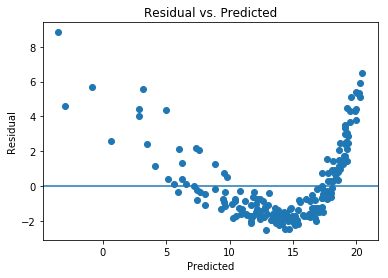

In [43]:
regr = linear_model.LinearRegression()
Y = advertise['Sales'].values.reshape(-1, 1)
X = advertise[['TV_log','Radio_log']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = advertise['Sales']
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()



In [103]:
advertise['Sales'].describe()

count   199.000
mean     14.049
std       5.217
min       1.600
25%      10.400
50%      12.900
75%      17.400
max      27.000
Name: Sales, dtype: float64


Coefficients: 
 [[ 0.05816257  0.18505647]]

Intercept: 
 [ 1.66213062]

R-squared:
0.908560960033


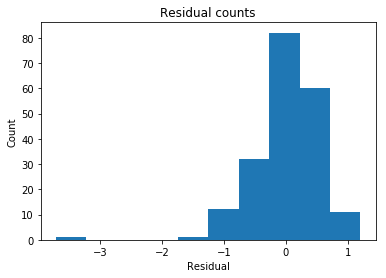

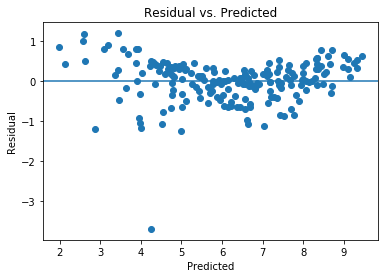

In [44]:
regr = linear_model.LinearRegression()
Y = advertise['Sales_BC'].values.reshape(-1, 1)
X = advertise[['TV_BC','Radio_BC']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = advertise['Sales_BC']
# Calculate the error, also called the residual.
residual = actual - predicted


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

